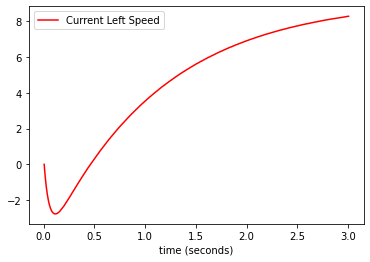

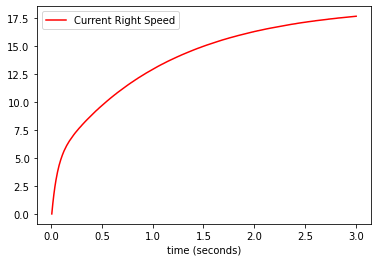

In [2]:
import sys
sys.path.append("../../")

#
# TO BE USED WITH godot/card2D_no_physics
#

from lib.data.dataplot import *
from lib.system.cart import *
from lib.system.controllers import *
from lib.dds.dds import *
from lib.utils.time import *

left_w = DataPlotter()
left_w.set_x("time (seconds)")
left_w.add_y("current_speed", "Current Left Speed")

right_w = DataPlotter()
right_w.set_x("time (seconds)")
right_w.add_y("current_speed", "Current Right Speed")

dds = DDS()
dds.start()

#dds.subscribe(['tick'])

cart2d = TwoWheelsCart2DEncodersOdometry(1.0, # 1 kg 
                                         0.3, # 30cm radius
                                         0.9, 0.8, # linear and angular friction
                                         0.04, 0.04, # traction wheels radius 4cm
                                         0.4, # traction wheels timebase 40cm
                                         0.03, 0.03, # encoder wheels radius 3cm
                                         0.5, # encoder wheels timebase 50cm
                                         4096) # resolution 4096 tick/rev

t = Time()
t.start()

torque_left = -0.5
torque_right = 1.0

while t.get() < 3:

    #dds.wait('tick')
    t.sleep(0.005)
    delta_t = t.elapsed()
    
    (current_left, current_right) = cart2d.get_wheel_speed()

    cart2d.evaluate(delta_t, torque_left, torque_right)
    
    pose = cart2d.get_pose()
    dds.publish('X', pose[0], DDS.DDS_TYPE_FLOAT)
    dds.publish('Y', pose[1], DDS.DDS_TYPE_FLOAT)
    dds.publish('Theta', pose[2], DDS.DDS_TYPE_FLOAT)

    left_w.append_x(t.get())
    left_w.append_y("current_speed", current_left)
    
    right_w.append_x(t.get())
    right_w.append_y("current_speed", current_right)

dds.stop()

left_w.plot()
right_w.plot()
